<a href="https://colab.research.google.com/github/3OMDEH/Machine-Learning-Projects-Beginner-/blob/main/TitanicProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# **Data Gathering**

In [ ]:
data = pd.read_csv('tested.csv')
data.shape
data.index
#data.loc[:,'Cabin']

RangeIndex(start=0, stop=29146, step=1)

# **Data Exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  419 non-null    int64  
 1   Survived     419 non-null    int64  
 2   Pclass       419 non-null    int64  
 3   Name         419 non-null    object 
 4   Sex          419 non-null    object 
 5   Age          333 non-null    float64
 6   SibSp        419 non-null    int64  
 7   Parch        419 non-null    int64  
 8   Ticket       419 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     419 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.4+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,419.000000,419.000000,419.000000,333.000000,419.000000,419.000000,418.000000
mean,1100.002387,0.362768,2.267303,30.285285,0.446301,0.391408,35.560686
std,121.095014,0.481374,0.841595,14.161731,0.895953,0.980442,55.857051
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,995.500000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#@title shows the number of unique values in each column
data.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


In [ ]:
#@title sorting
data.sort_values(by='Age',ascending=True).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
202,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
282,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
308,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
251,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
118,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
297,1188,1,2,"Laroche, Miss. Louise",female,1.00,1,2,SC/Paris 2123,41.5792,NaN,C
264,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
90,981,0,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
285,1176,1,3,"Rosblom, Miss. Salli Helena",female,2.00,1,1,370129,20.2125,NaN,S


In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"/Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,892,0,3,"/Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,894,0,2,"_Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
4,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,896,1,3,"/Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
7,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
9,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [ ]:
#@title .
"""
data['Cabin'] = data['Cabin'].fillna('N')
data['Cabin']
"""

"""
NaN values in Pandas are not strings; they are of type float (specifically numpy.nan).
The str.replace() function only works on string values, so it doesn't affect actual NaN values.

Fix: Use .fillna() Instead
"""

"\nNaN values in Pandas are not strings; they are of type float (specifically numpy.nan).\nThe str.replace() function only works on string values, so it doesn't affect actual NaN values.\n\nFix: Use .fillna() Instead\n"

In [ ]:
#@title Strip
data['Name'] = data['Name'].str.lstrip("/#@")
data['Name']

,Name
0,"Kelly, Mr. James"
1,"Kelly, Mr. James"
2,"Wilkes, Mrs. James (Ellen Needs)"
3,"_Myles, Mr. Thomas Francis"
4,"Wirz, Mr. Albert"
...,...
414,"Spector, Mr. Woolf"
415,"Oliva y Ocana, Dona. Fermina"
416,"Saether, Mr. Simon Sivertsen"
417,"Ware, Mr. Frederick"


In [ ]:
#@title Removing Duplicates
data.drop_duplicates(inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,894,0,2,"_Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
4,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
7,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
9,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
10,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
#@title Correlation
"""
# Dropped categorical columns to show the correlation
categorical_columns = data.dtypes[data.dtypes == 'object'].index
data.drop(categorical_columns, axis=1, inplace=True)

# shows the correlation between every column
data.corr() # calculates the correlation matrix between all numerical columns in the data DataFrame.

--------------
The correlation matrix shows how strongly different
features are related to each other.
"""

"\n# Dropped categorical columns to show the correlation\ncategorical_columns = data.dtypes[data.dtypes == 'object'].index\ndata.drop(categorical_columns, axis=1, inplace=True)\n\n# shows the correlation between every column\ndata.corr() # calculates the correlation matrix between all numerical columns in the data DataFrame.\n\n--------------\nThe correlation matrix shows how strongly different\nfeatures are related to each other.\n"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


# **Data Visualization**

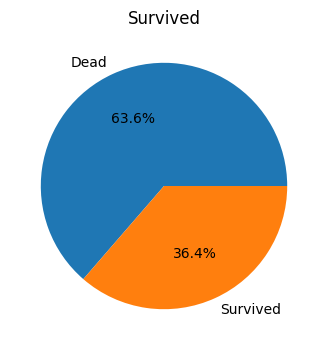

In [ ]:
#@title Pie Chart
import matplotlib.pyplot as plt

# Generate the satisfaction data
satisfaction = data['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
plt.pie(
    satisfaction,
    labels=['Dead', 'Survived'],
    autopct='%1.1f%%'
)
plt.title('Survived')
plt.show()

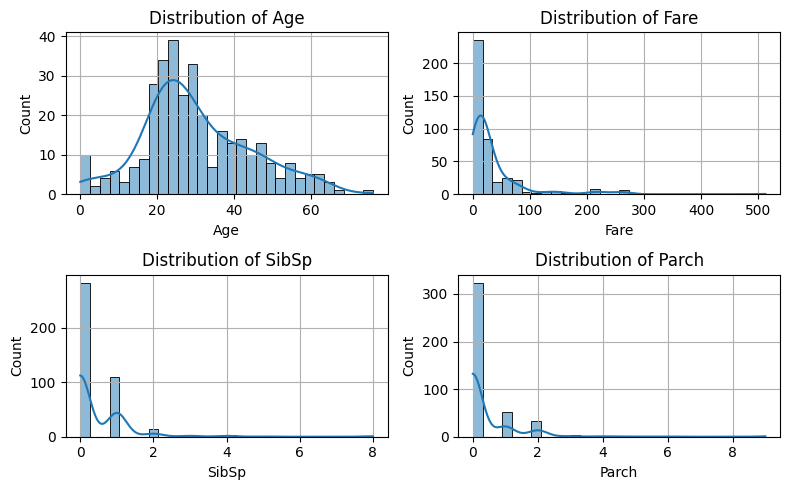

'# Plot 2: Boxplots for numerical columns\nplt.figure(figsize=(8, 5))\nsns.boxplot(data=data[numerical_cols])\nplt.xticks(rotation=45)\nplt.title("Boxplot of Numerical Features")\nplt.grid(True)\nplt.show()'

In [ ]:
#@title Histograms for numerical columns
import seaborn as sns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(8, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.grid(True)
plt.tight_layout()
plt.show()

"""# Plot 2: Boxplots for numerical columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.grid(True)
plt.show()"""


In [ ]:
#@title Heat
"""
sns.heatmap(data.corr(),annot=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()"""

"\nsns.heatmap(data.corr(),annot=True)\nplt.rcParams['figure.figsize'] = (8,5)\nplt.show()"

<Axes: >

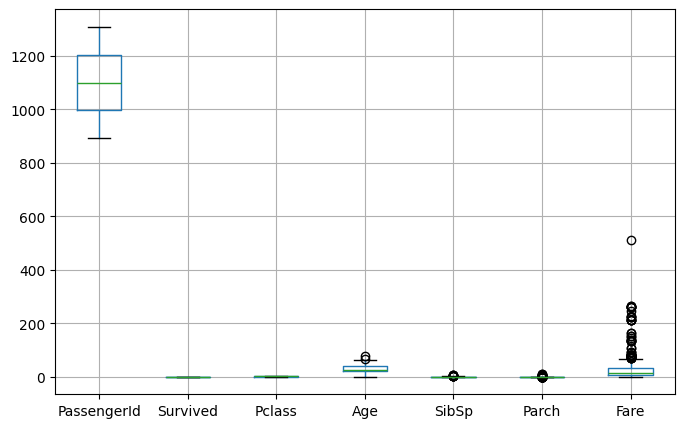

In [ ]:
data.boxplot(figsize=(8,5))

# **Data Preparation**

In [ ]:
#@title Making a copy of the data
data_copy = data.copy()
data_copy.info()
data_copy.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [ ]:
#@title Checking for missing values
data_copy.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
#@title Handling Missing Values
Age_mean = data_copy['Age'].mean()
data_copy['Age'].fillna(value=Age_mean,inplace=True)

Fare_mean = data_copy['Fare'].mean()
data_copy['Fare'].fillna(value=Fare_mean,inplace=True)

"""
fillna method is only available for pandas series and dataframes, it cant be used for numpy arrays or lists.
dropna method is used to remove missing values (NaN) from a pandas series or dataframe, this method removes any row or column that contains a missing value.
"""

<ipython-input-85-499b252ff350>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Age'].fillna(value=Age_mean,inplace=True)
<ipython-input-85-499b252ff350>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

'\nfillna method is only available for pandas series and dataframes, it cant be used for numpy arrays or lists.\ndropna method is used to remove missing values (NaN) from a pandas series or dataframe, this method removes any row or column that contains a missing value.\n'

In [ ]:
#@title Removing Outliers from the Age column
Q1 = data_copy['Age'].quantile(0.25)
Q3 = data_copy['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_copy = data_copy[(data_copy['Age'] >= lower_bound) & (data_copy['Age'] <= upper_bound)]
# keeping only the rows where the 'Age' value falls within the calculated lower_bound and upper_bound

# **Splitting the Data**

In [ ]:
#@title Splitting the data
# Features
x = data_copy.drop('Survived',axis=1)

# Target
y = data_copy['Survived']

In [ ]:
#@title One Hot Encoding

x = pd.get_dummies(x,columns=['Sex','Embarked'],drop_first=True).astype(int)

x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34,0,0,7,1,1,0
2,3,47,1,0,7,0,0,1
4,3,27,0,0,8,1,0,1
5,3,22,1,1,12,0,0,1
6,3,14,0,0,9,1,0,1


In [ ]:
#@title Checking the number of samples for each class in Survived before solving the imbalance
"""
.value_counts() is a method applied to Pandas Series.
It calculates the frequency of each unique value within the Series.
"""
y.value_counts()

,count
Survived,
0,249
1,133


In [ ]:
#@title Handling Data Imbalance
over_sampling = SMOTE()
x,y = over_sampling.fit_resample(x,y)
"""
SMOTE stands for Synthetic Minority Over-sampling Technique.
It's a powerful method for generating synthetic data points for the minority class to balance the dataset.

fit_resample does two things:
  -It analyzes the data to understand the distribution of the minority class.
  -It generates new synthetic samples for the minority class to balance it with the majority class.

SMOTE returns Numpy array
"""

y.value_counts()


,count
Survived,
0,249
1,249


In [ ]:
#@title Data scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
x = pd.DataFrame(data = data_scaled, columns = x.columns)

x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.909186,0.507036,-0.452232,-0.374076,-0.555098,1.0,2.727761,-1.119551
1,0.909186,1.899129,0.745701,-0.374076,-0.555098,-1.0,-0.366601,0.893216
2,0.909186,-0.242552,-0.452232,-0.374076,-0.535174,1.0,-0.366601,0.893216
3,0.909186,-0.777972,0.745701,0.660867,-0.455480,-1.0,-0.366601,0.893216
4,0.909186,-1.634644,-0.452232,-0.374076,-0.515251,1.0,-0.366601,0.893216


# **Building the models**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
Dtree = DecisionTreeClassifier()
Naiveb = GaussianNB()
svm = SVC()
Rforest = RandomForestClassifier()

# **Training the models**

In [ ]:
#@title Knn
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {knn_accuracy:.4f}") # printing the accuracy

correct_predictions = np.sum(y_test == y_pred).sum()
print(f"Correct Predictions: {correct_predictions}")
false_predictions = np.sum(y_test != y_pred).sum()
print(f"False Predictions: {false_predictions}")

Accuracy: 0.9840
Correct Predictions: 123
False Predictions: 2


In [ ]:
#@title Dicision Tree
Dtree.fit(x_train,y_train)
y_pred = Dtree.predict(x_test)
DT_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {DT_accuracy:.4f}") # printing the accuracy
correct_predictions = np.sum(y_test == y_pred).sum()
print(f"Correct Predictions: {correct_predictions}")
false_predictions = np.sum(y_test != y_pred).sum()
print(f"False Predictions: {false_predictions}")

Accuracy: 1.0000
Correct Predictions: 125
False Predictions: 0


In [ ]:
#@title Naive Bayes
Naiveb.fit(x_train,y_train)
y_pred = Naiveb.predict(x_test)
Naive_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {Naive_accuracy:.4f}") # printing the accuracy
correct_predictions = np.sum(y_test == y_pred).sum()
print(f"Correct Predictions: {correct_predictions}")
false_predictions = np.sum(y_test != y_pred).sum()
print(f"False Predictions: {false_predictions}")

Accuracy: 1.0000
Correct Predictions: 125
False Predictions: 0


In [ ]:
#@title Support Vector Machine (SVM)
svm.fit(x_train,y_train) # Training the SVM model
y_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_accuracy:.4f}") # printing the accuracy
correct_predictions = np.sum(y_test == y_pred).sum()
print(f"Correct Predictions: {correct_predictions}")
false_predictions = np.sum(y_test != y_pred).sum()
print(f"False Predictions: {false_predictions}")

Accuracy: 1.0000
Correct Predictions: 125
False Predictions: 0


In [ ]:
#@title Random Forest
Rforest.fit(x_train,y_train)
y_pred = Rforest.predict(x_test)
RF_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {RF_accuracy:.4f}") # printing the accuracy
correct_predictions = np.sum(y_test == y_pred).sum()
print(f"Correct Predictions: {correct_predictions}")
false_predictions = np.sum(y_test != y_pred).sum()
print(f"False Predictions: {false_predictions}")

Accuracy: 1.0000
Correct Predictions: 125
False Predictions: 0


Confusion Matrix:
[[63  0]
 [ 0 62]]
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


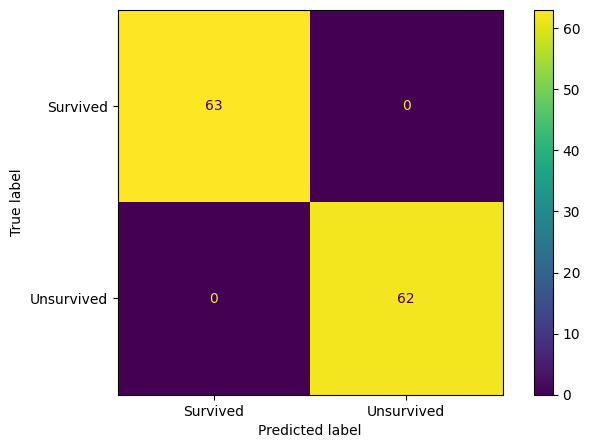

In [ ]:
# prompt: generate confusion matrix for the Random Forest Model above, and provide the precision, f1-score and recall
#@title Confusion matrix

import matplotlib.pyplot as plt
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display the confusion matrix visually (optional)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Survived', 'Unsurvived'])
disp.plot()
plt.show()
